# Data Import


In [1]:
# Importing necessary functions

import os
import random
import Augmentor
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2
import tensorflow as tf

In [9]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


SyntaxError: invalid syntax (3389818620.py, line 13)

In [11]:
!pip install pywavelets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 1.3 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


# WaveTF Model


In [14]:
import pywt
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class WaveletPooling(Layer):
    def __init__(self, wavelet_name='haar', level=1, **kwargs):
        super(WaveletPooling, self).__init__(**kwargs)
        self.wavelet_name = wavelet_name
        self.level = level

    def build(self, input_shape):
        super(WaveletPooling, self).build(input_shape)

    def call(self, inputs):
        def wavelet_pooling(image):
            coeffs = pywt.wavedec2(image, wavelet=self.wavelet_name, level=self.level)
            cA, (cH, cV, cD) = coeffs[0], coeffs[1]
            pooled = cA  # Using approximation coefficients for pooling
            return pooled

        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        height = input_shape[1] // (2 ** self.level)
        width = input_shape[2] // (2 ** self.level)
        channels = input_shape[3]

        pooled_outputs = tf.TensorArray(tf.float32, size=batch_size)

        for i in tf.range(batch_size):
            pooled_channels = []
            for ch in tf.range(channels):
                pooled_channel = tf.py_function(func=wavelet_pooling, inp=[inputs[i, :, :, ch]], Tout=tf.float32)
                pooled_channels.append(pooled_channel)
            pooled_output = tf.stack(pooled_channels, axis=-1)
            pooled_outputs = pooled_outputs.write(i, pooled_output)

        return pooled_outputs.stack()

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] // (2 ** self.level), input_shape[2] // (2 ** self.level), input_shape[3])



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

img_width, img_height = 128, 128  # Example input dimensions

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(WaveletPooling())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(WaveletPooling())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(WaveletPooling())
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


InaccessibleTensorError: Exception encountered when calling layer "wavelet_pooling_1" (type WaveletPooling).

in user code:

    File "/var/folders/pg/zfnz4zn13zlgg_1mt9vl4w900000gn/T/ipykernel_5941/1836252848.py", line 35, in call  *
        pooled_output = tf.stack(pooled_channels, axis=-1)
    File "/opt/homebrew/lib/python3.11/site-packages/tensorflow/core/function/capture/capture_container.py", line 144, in capture_by_value
        graph._validate_in_scope(tensor)  # pylint: disable=protected-access

    InaccessibleTensorError: <tf.Tensor 'wavelet_pooling_1/while/while/EagerPyFunc:0' shape=<unknown> dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
    Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.
    
    <tf.Tensor 'wavelet_pooling_1/while/while/EagerPyFunc:0' shape=<unknown> dtype=float32> was defined here:
        File "<frozen runpy>", line 198, in _run_module_as_main
        File "<frozen runpy>", line 88, in _run_code
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1077, in launch_instance
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start
        File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
        File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
        File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
        File "/Users/aditya/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
        File "/var/folders/pg/zfnz4zn13zlgg_1mt9vl4w900000gn/T/ipykernel_5941/1186460807.py", line 8, in <module>
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 229, in add
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1063, in __call__
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 2593, in _functional_construction_call
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 2439, in _keras_tensor_symbolic_call
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 2498, in _infer_output_signature
        File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
        File "/var/folders/pg/zfnz4zn13zlgg_1mt9vl4w900000gn/T/ipykernel_5941/1836252848.py", line 30, in call
        File "/var/folders/pg/zfnz4zn13zlgg_1mt9vl4w900000gn/T/ipykernel_5941/1836252848.py", line 32, in call
        File "/var/folders/pg/zfnz4zn13zlgg_1mt9vl4w900000gn/T/ipykernel_5941/1836252848.py", line 33, in call
    
    The tensor <tf.Tensor 'wavelet_pooling_1/while/while/EagerPyFunc:0' shape=<unknown> dtype=float32> cannot be accessed from FuncGraph(name=wavelet_pooling_1_while_body_2554, id=6277521776), because it was defined in FuncGraph(name=wavelet_pooling_1_while_while_body_2584, id=6277522784), which is out of scope.


Call arguments received by layer "wavelet_pooling_1" (type WaveletPooling):
  • inputs=tf.Tensor(shape=(None, 126, 126, 16), dtype=float32)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from wavetf._wavetf import WaveTFFactory

# Define the EncoderMiniBlock as a function
def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True, wave_kern="db2"):
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = BatchNormalization()(conv)
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
    if max_pooling:
        next_layer = WaveTFFactory.build(wave_kern)(conv)
    else:
        next_layer = conv
    return next_layer, conv

# Define the functional model
inputs = Input(shape=(150, 150, 3))
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x, skip1 = EncoderMiniBlock(x, n_filters=32, dropout_prob=0.3, max_pooling=True, wave_kern="db2")
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 74, 74, 32)        4640      
                                                                 
 conv2d_25 (Conv2D)          (None, 74, 74, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 74, 74, 32)        128       
 chNormalization)                                          

# Loading Images


In [2]:
normal_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy'
implant_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays'

# Get a list of all files in the data folder
normal_files = os.listdir(normal_data_folder)
implant_files = os.listdir(implant_data_folder)

normal_files = [file for file in normal_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
implant_files = [file for file in implant_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

normal_image_list = []
for image_file in normal_files:
    image_path = os.path.join(normal_data_folder, image_file)
    img = Image.open(image_path)
    normal_image_list.append(img)

implant_image_list = []
for image_file in implant_files:
    image_path = os.path.join(implant_data_folder, image_file)
    img = Image.open(image_path)
    implant_image_list.append(img)

    


# Data Augmentation



In [3]:
p_normal = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy')
p_normal.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p_normal.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

p_normal.sample(400)

Initialised with 50 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays copy/output.

Processing <PIL.Image.Image image mode=L size=1208x1502 at 0x282B37DD0>: 100%|██████████| 400/400 [00:10<00:00, 37.83 Samples/s]                


In [4]:
p_implant = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays')
p_implant.rotate(probability=0.7, max_left_rotation=20, max_right_rotation=20)
p_implant.zoom(probability=0.5, min_factor=0.8, max_factor=1.6)

p_implant.sample(400)

Initialised with 25 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/output.

Processing <PIL.Image.Image image mode=L size=1220x1429 at 0x282C7F650>: 100%|██████████| 400/400 [00:24<00:00, 16.18 Samples/s]                


# Model


In [31]:
implant_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Implant Xrays'
normal_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Normal Xrays copy'

# Define image dimensions and other parameters
img_width, img_height = 150, 150  
batch_size = 32
epochs = 50

# Define the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 17, 64)       

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Adjust the validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

validation_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50,
    callbacks=[checkpoint]
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.5239 - accuracy: 0.7281
Epoch 1: val_accuracy improved from -inf to 0.56875, saving model to best_model.h5
20/20 [==============================] - 13s 635ms/step - loss: 0.5239 - accuracy: 0.7281 - val_loss: 0.9056 - val_accuracy: 0.5688
Epoch 2/50


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - ETA: 0s - loss: 0.2615 - accuracy: 0.8969
Epoch 2: val_accuracy did not improve from 0.56875
20/20 [==============================] - 13s 663ms/step - loss: 0.2615 - accuracy: 0.8969 - val_loss: 1.4675 - val_accuracy: 0.5437
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9688
Epoch 3: val_accuracy did not improve from 0.56875
20/20 [==============================] - 12s 612ms/step - loss: 0.1228 - accuracy: 0.9688 - val_loss: 1.2363 - val_accuracy: 0.5625
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9766
Epoch 4: val_accuracy did not improve from 0.56875
20/20 [==============================] - 12s 621ms/step - loss: 0.0939 - accuracy: 0.9766 - val_loss: 1.0363 - val_accuracy: 0.5688
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9766
Epoch 5: val_accuracy did not improve from 0.56875
20/20 [============================

In [26]:
train_loss = (history.history['loss'])
val_loss = (history.history['val_loss'])
train_acc = (history.history['accuracy'])
val_acc = (history.history['val_accuracy'])

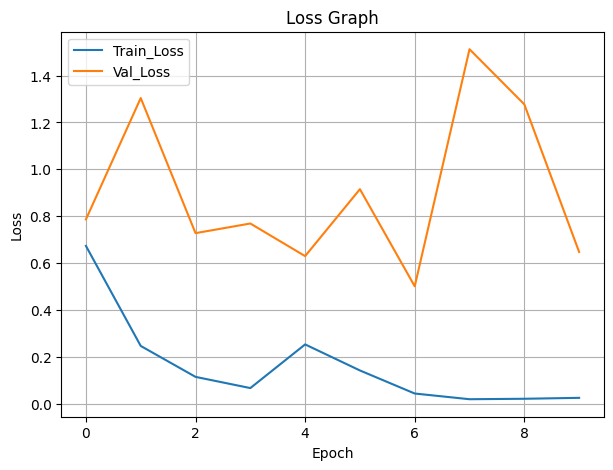

In [14]:
plt.figure(figsize=(7,5))
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(['Train_Loss','Val_Loss'])

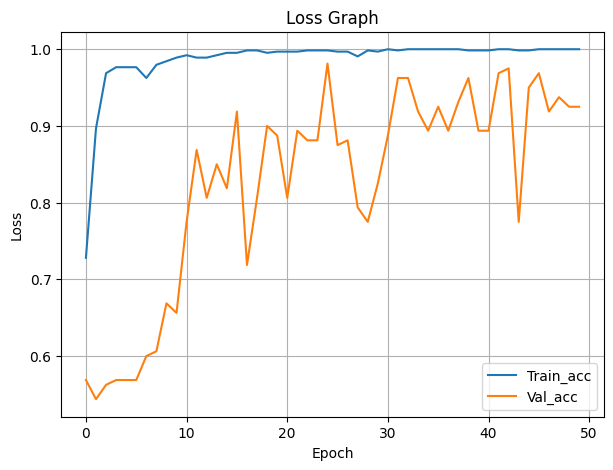

In [27]:
plt.figure(figsize=(7,5))
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['Train_acc','Val_acc'])

In [17]:
best_model = load_model(checkpoint_path)

In [12]:
model.save('xray_classifier_model_80_.keras')

# Testing the Model

In [34]:
model = load_model('/Users/aditya/Desktop/My Computer/DDP/New/Files/xray_classifier_model.h5')  # Use the actual path to your saved model
img_arr = []

for i in range(5):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the pixel values
    img_arr.append(img)

for i in range(5):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.load_img(image_path, target_size=(150, 150))  
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the pixel values
    img_arr.append(img)


img_arr = random.sample(img_arr, len(img_arr))

In [35]:
img_arr = np.array(img_arr)

print(img_arr.shape)


(10, 1, 150, 150, 3)


1/1 [==============================] - 0s 14ms/step


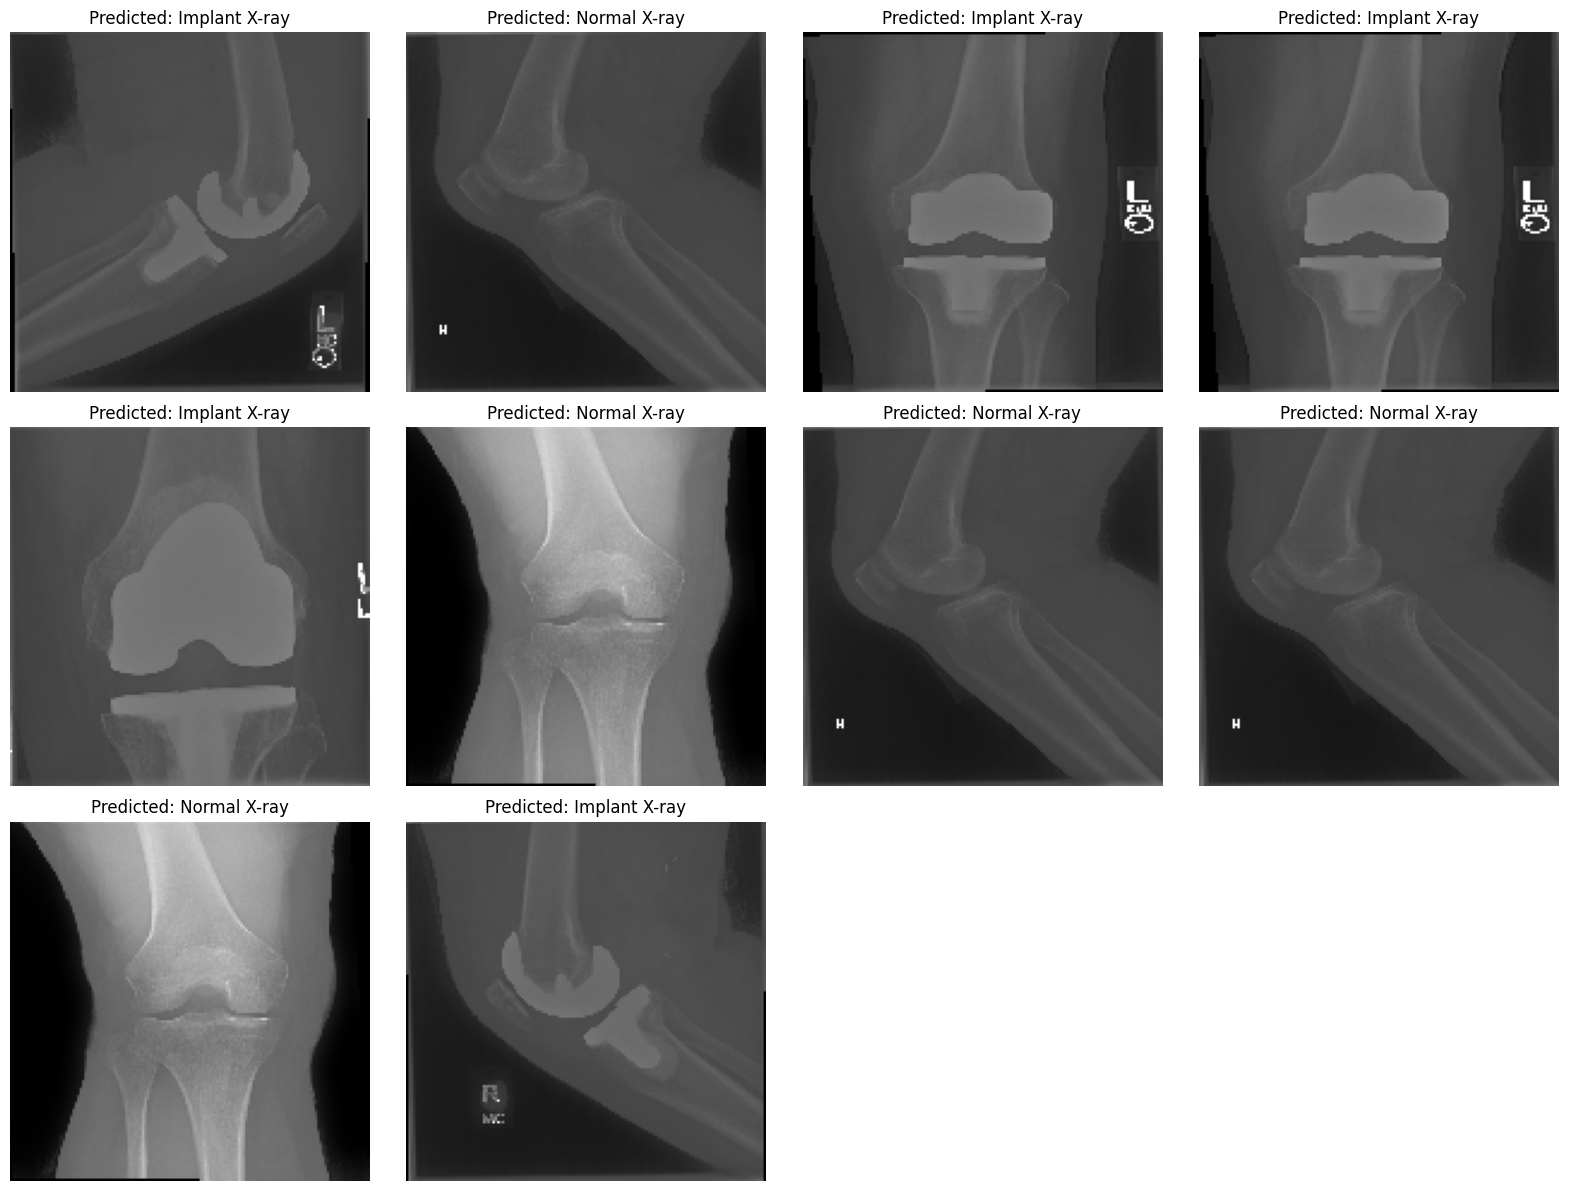

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming img_arr is a list of 10 images and model is your trained model

# Calculate the number of rows and columns for the grid
num_images = len(img_arr)
num_cols = 4  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Round up division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, img in enumerate(img_arr):
    
    row_index = i // num_cols
    col_index = i % num_cols
    
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(img[0])
    ax.axis('off')
    
    prediction = model.predict(img)

    if prediction[0][0] >= 0.5:
        ax.set_title("Predicted: Normal X-ray")
    else:
        ax.set_title("Predicted: Implant X-ray")

# Hide empty subplots
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show() 


# Heat Map



In [37]:
model_builder = keras.applications.xception.Xception
img_size = (150, 150)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_2"


In [38]:
def make_gradcam_heatmap(image, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(image)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 30ms/step
(34, 34)


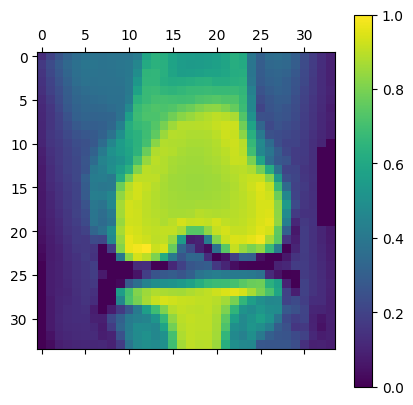

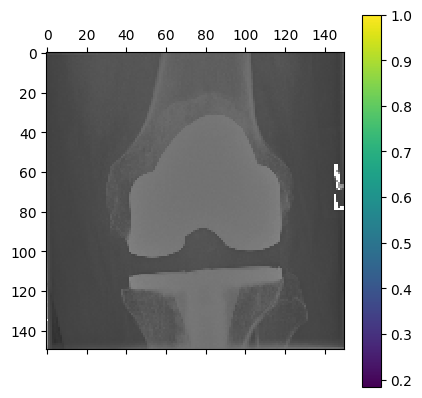

In [40]:
# Prepare image
# Make model
# 
# Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is

num_images = 2
num_cols = 2 # Number of columns in the grid
num_rows = 1
curr_img = img_arr[4]

preds = model.predict(curr_img)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(curr_img, model, last_conv_layer_name)

# Display heatmap
print(heatmap.shape)
plt.matshow(heatmap)
plt.colorbar()  # Add intensity bar
plt.show()

plt.matshow(curr_img[0])
plt.colorbar()  # Add intensity bar
plt.show()

(34, 34)
(150, 150, 3)


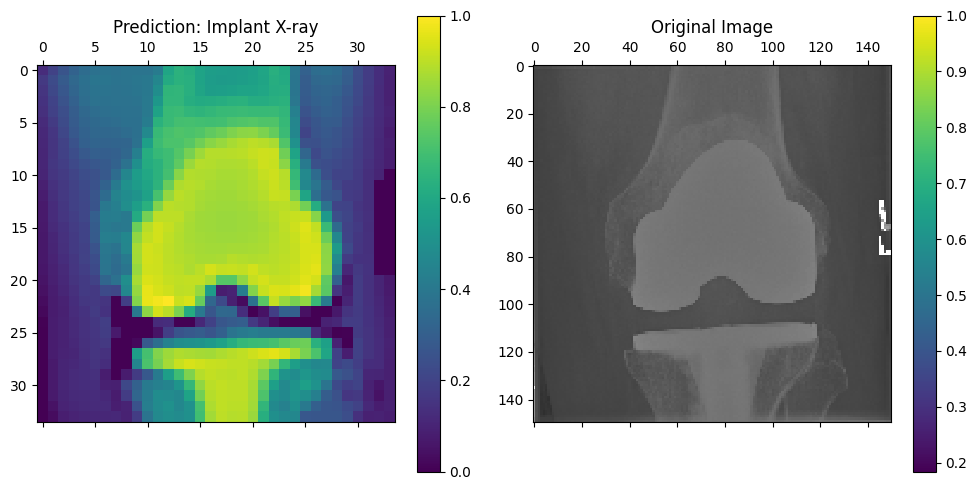

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
print(heatmap.shape)
print(curr_img[0].shape)
# Plot heatmap1
axs[0].matshow(heatmap)
axs[0].set_title('Prediction: Implant X-ray')
axs[0].grid(False)
fig.colorbar(axs[0].matshow(heatmap), ax=axs[0])

# Plot heatmap2
axs[1].matshow(curr_img[0])
axs[1].set_title('Original Image')
axs[1].grid(False)
fig.colorbar(axs[1].matshow(curr_img[0]), ax=axs[1])

plt.tight_layout()
plt.show()